# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 

from sklearn import preprocessing

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive')

# Reading Data

In [ ]:
df= pd.read_csv('input.csv')

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Since Personal loan is the target variable, moving it to the last column for convenience

In [ ]:
target_col=df['Personal Loan']
df.drop(axis=1, columns='Personal Loan', inplace=True)

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [ ]:
df['Personal Loan']= target_col

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


# EDA

### Size and shape of the data

In [ ]:
print('The shape of the data is', df.shape)
print('No of rows: ', df.shape[0])
print('No of columns:', df.shape[1])
print('Total no of data entries:', df.size)

The shape of the data is (5000, 14)
No of rows:  5000
No of columns: 14
Total no of data entries: 70000


### The names of the attribitues

In [ ]:
print('The columns are')
for i in df.columns:
    print(i)

The columns are
ID
Age
Experience
Income
ZIP Code
Family
CCAvg
Education
Mortgage
Securities Account
CD Account
Online
CreditCard
Personal Loan


### The data types of each attribute

In [ ]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

### Observation: Here we can see that all the variables are numerical.

## Checking for null values

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

### Observation: No null values

## Checking for unique values

In [ ]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

### Observation: The columns 'CD Account', 'Online', 'Family', 'Education' , 'CreditCard' and 'Securities Account' are categorical variable. The target variable is also a categorical variable

## Five point Summary

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [ ]:
five_point=df.describe().T
five_point[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


### Caution: Though rest of the attributes look clean, the experience attribute has negative value which is impossible. It is mandatory to clean it before proceeding with the model building

## Since the attribute 'Experience' has negative value it should be replaced with some other positive value before proceeding futher. Replacing it with median value is one logical option.

In [ ]:
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [ ]:
df_Possitive_Experience = df[df['Experience'] > 0]
df_Negative_Experience =  df[df['Experience'] < 0]
df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

for id in df_Negative_Experience_List:
    age_values = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education_values = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = df_Possitive_Experience[(df_Possitive_Experience['Age'] == age_values) & (df_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) & (df_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = abs(exp)

In [ ]:
df[df['Experience'] < 0]['Experience'].count()

0

# Data Visualization

In [ ]:
sns.set(color_codes=True)

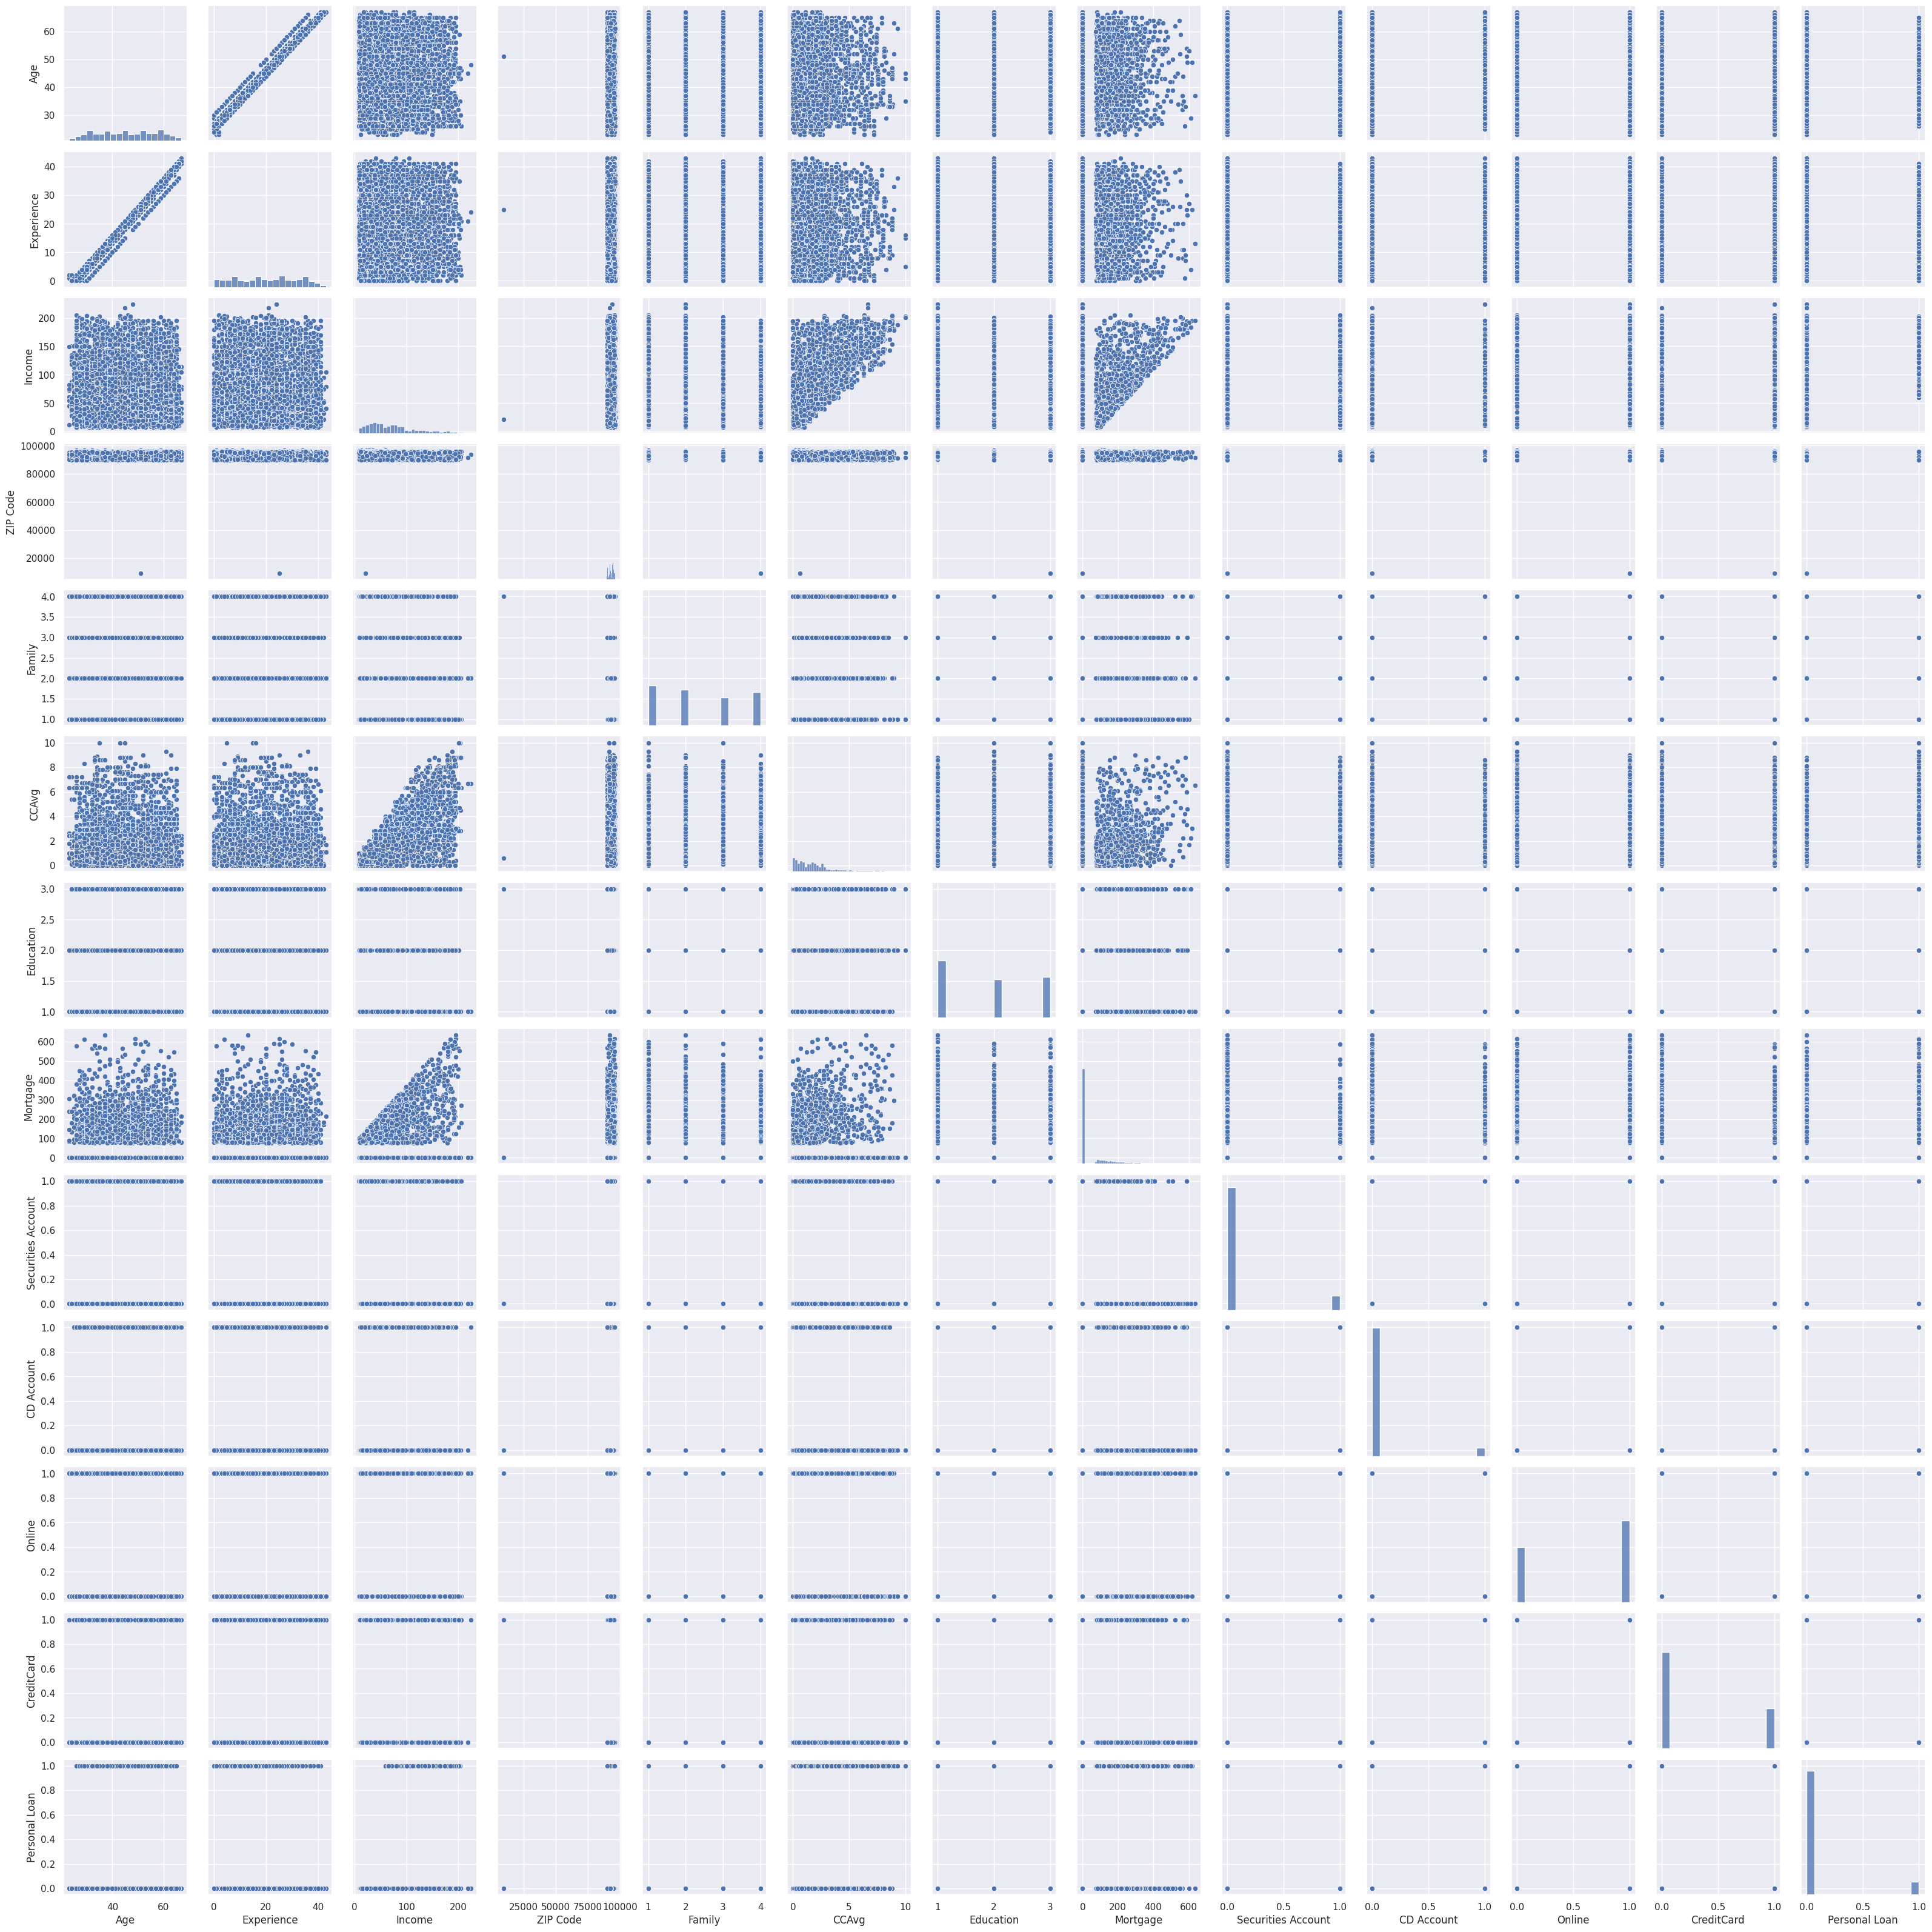

In [ ]:
sns.pairplot(df.iloc[:,1:])

<ipython-input-28-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

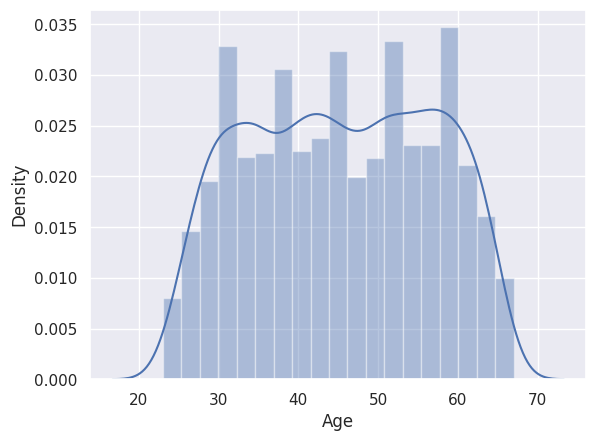

In [ ]:
sns.distplot(df['Age'])

The attribute 'Age' is normally distributed but has negative values

<ipython-input-29-c295d2895934>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Experience'])


<Axes: xlabel='Experience', ylabel='Density'>

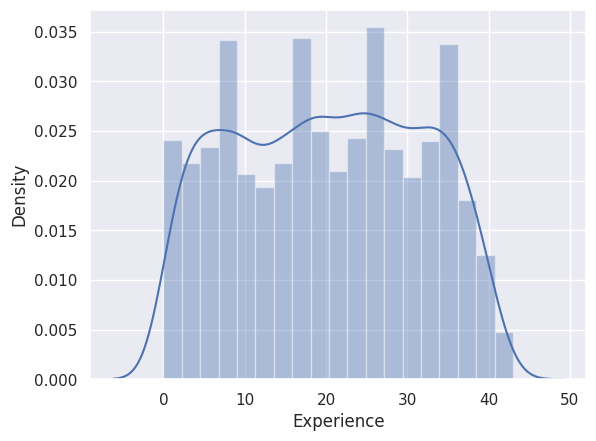

In [ ]:
sns.distplot(df['Experience'])

The attribute 'Experience' is normally distributed but has negative values

<Axes: xlabel='Age', ylabel='Experience'>

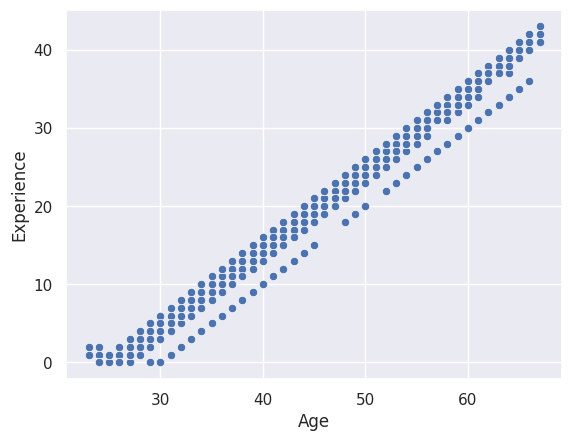

In [ ]:
sns.scatterplot(data=df, x=df['Age'], y=df['Experience'])

Age and Experience have a postive association

<Axes: >

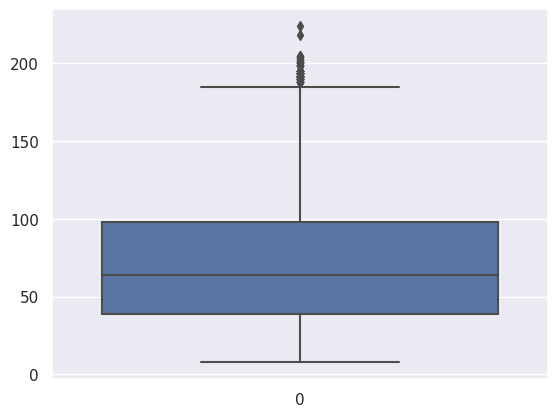

In [ ]:
sns.boxplot(df['Income'])

The attribute 'Income' has outliers

<ipython-input-33-332167f08bea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

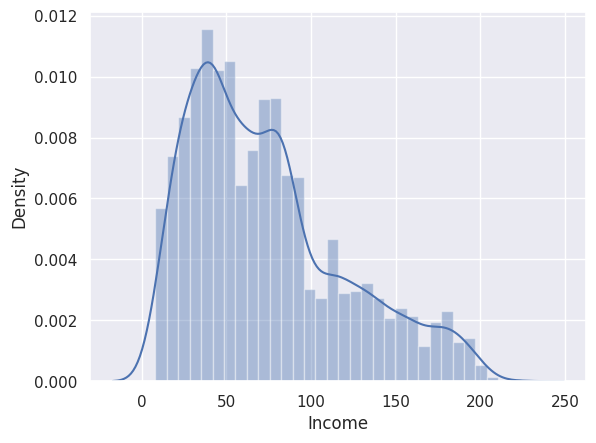

In [ ]:
sns.distplot(df['Income'])

The right tail of the distribution is longer, hence the attribute 'Income' is postively skewed

<Axes: >

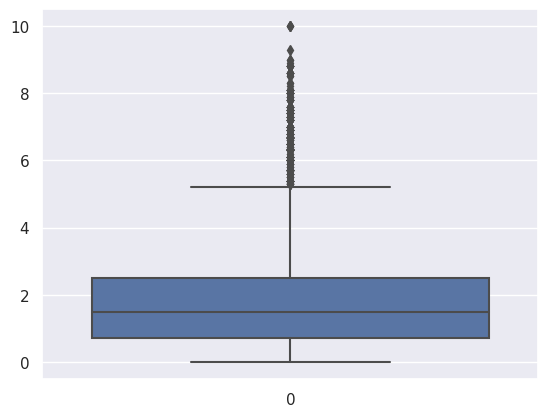

In [ ]:
sns.boxplot(df['CCAvg'])

The attribute 'CCAvg' has a lot of outliers

<ipython-input-35-adf2e82b575c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CCAvg'])


<Axes: xlabel='CCAvg', ylabel='Density'>

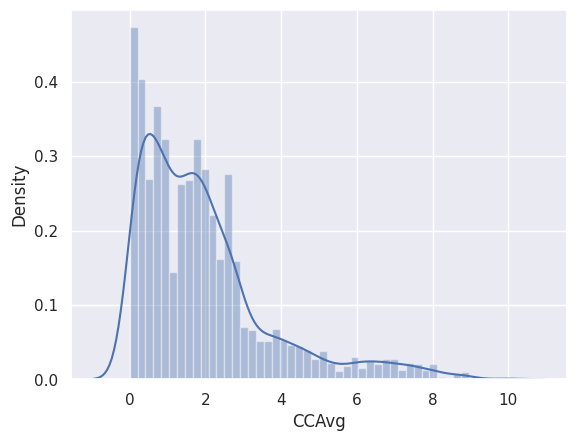

In [ ]:
sns.distplot(df['CCAvg'])

Again the right tails is much longer than the left tail, hence this attribute is also positively skewed

<Axes: >

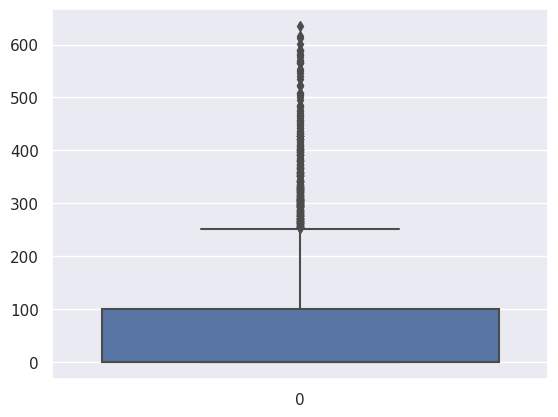

In [ ]:
sns.boxplot(df['Mortgage'])

<ipython-input-37-b678c3ac20c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mortgage'])


<Axes: xlabel='Mortgage', ylabel='Density'>

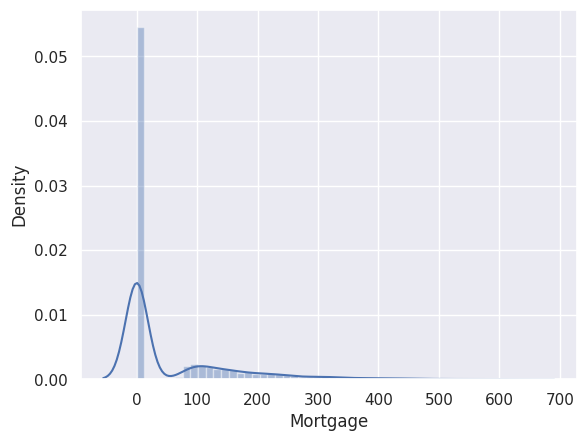

In [ ]:
sns.distplot(df['Mortgage'])

From the above two plots it is evident that the attribute 'Mortgage' has both outliers and is postively skewed

# Check Skewness

In [ ]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Income),stats.skew(df.CCAvg),stats.skew(df.Mortgage)]},
                        index=['Income','CCAvg','Mortgage'])  
Skewness

,Skewness
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


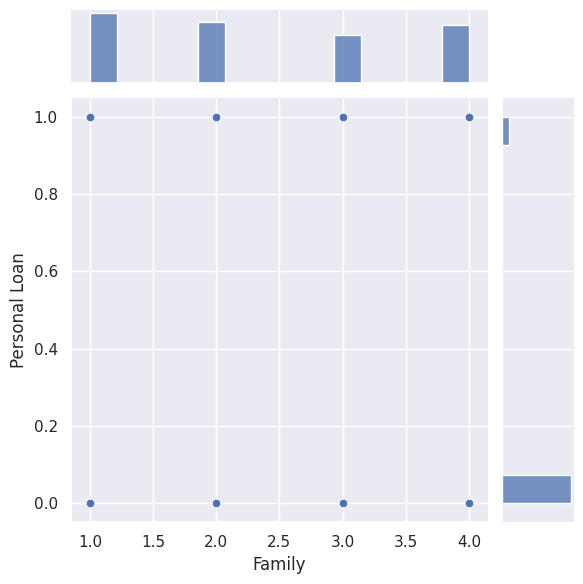

In [ ]:
sns.jointplot(data =df, x = df['Family'], y = df['Personal Loan'])

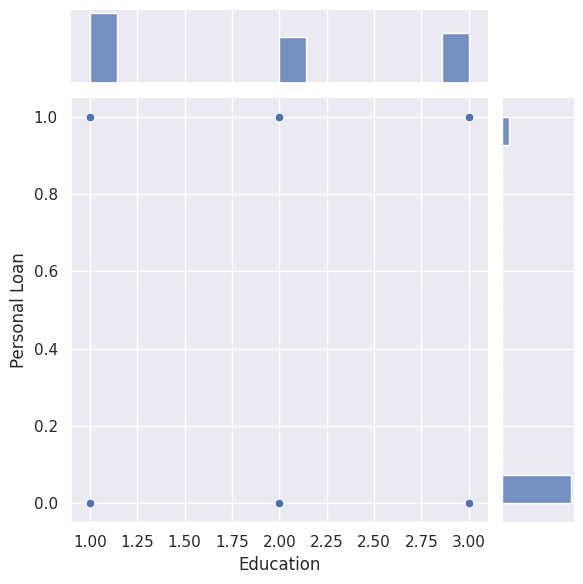

In [ ]:
sns.jointplot(data = df, x = df['Education'], y = df['Personal Loan'])

The attributes 'Family' and 'Education' have less association with the target attribute 'Personal Loan'

# Analysing the target variable

<ipython-input-42-aaf5aa38f624>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Personal Loan'])


<Axes: xlabel='Personal Loan', ylabel='Density'>

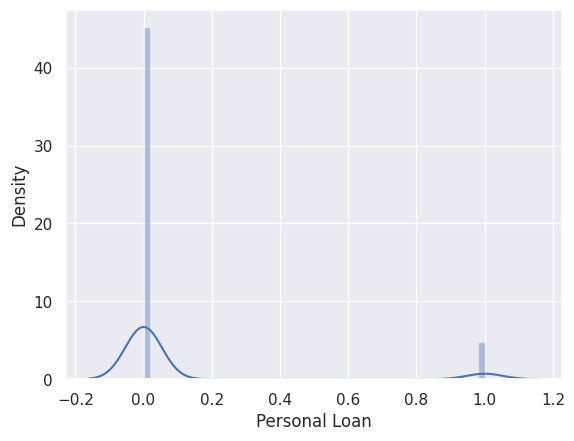

In [ ]:
sns.distplot(df['Personal Loan'])

It is a categorical attribute with only two variables, either 1 or 0. 0 corresponds to personal loan being refused by customer and 1 corresponds to person loan being accepted by customer. From the plot it is evident that most of them have refused the loan

In [ ]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

This gives us the number of persons who have accepted and refused the loan. Since the data is highly biased, it is probable that the model will tend to predict the people who will refuse more correctly than those who will accept

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

<ipython-input-45-9021a75539ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Education'])


<Axes: xlabel='Education', ylabel='Density'>

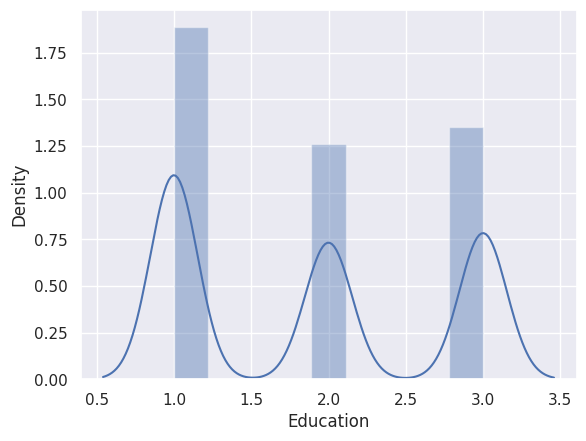

In [ ]:
sns.distplot(df['Education'])

Undergrad level customers are more than the Graduate and Advanced/Professional customers.

<ipython-input-46-7781c9bcdaba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Online'])


<Axes: xlabel='Online', ylabel='Density'>

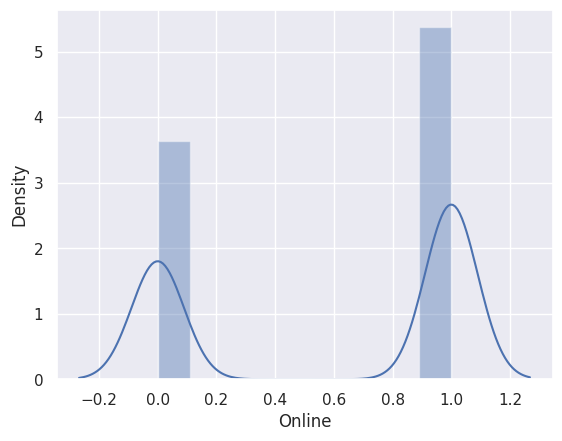

In [ ]:
sns.distplot(df['Online'])

This is a Bernoulli Distrubution. Number of customers who have Online accout is geater than the number of customers who do not have online account

<ipython-input-47-341b2de73440>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CreditCard'])


<Axes: xlabel='CreditCard', ylabel='Density'>

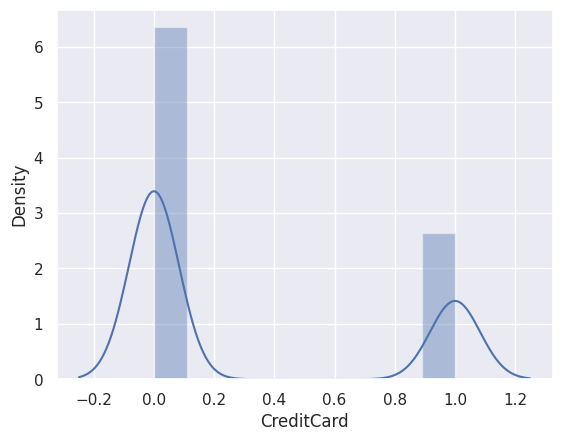

In [ ]:
sns.distplot(df['CreditCard'])

Again, it is a Bernoulli Distrubution. Number of customers without Credit Card is almost double than the number of customers with Credit Card.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.9% of the points cannot be plac

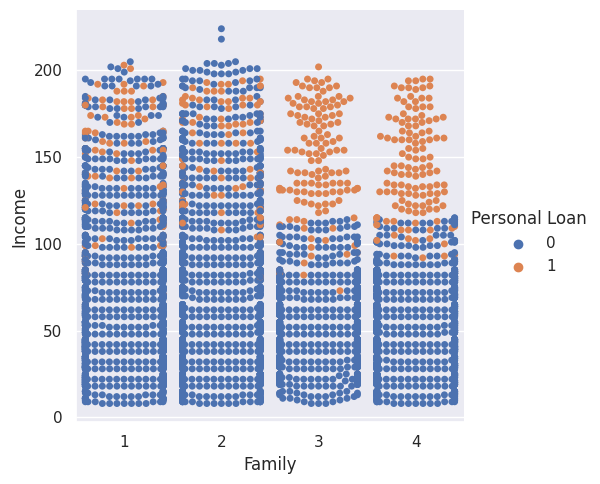

In [ ]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

<Axes: xlabel='Education', ylabel='Income'>

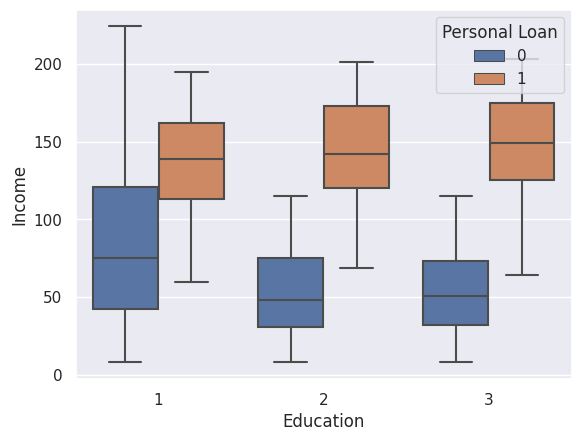

In [ ]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = df)

From above we can say that customers with undergraduate level of education and family greater than 3 are good customers who took loan. Customer who took loan have same income range irrespective of education level. Education of Graduate and above have more chance to take loan.

<Axes: xlabel='Education', ylabel='Mortgage'>

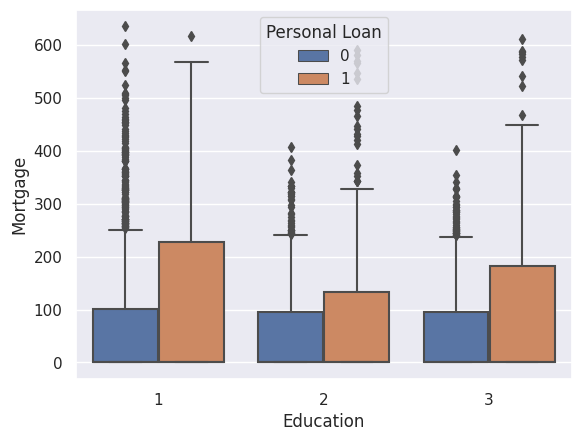

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

From the above box plot we can see that customers whose education level is 1 and did not take loan has higher mortgage than customers who take loan of same education level. Customers whose education level is 2and 3 and did not take loan has lesser mortgage than customers who take loan of same education level.

<Axes: xlabel='Securities Account', ylabel='count'>

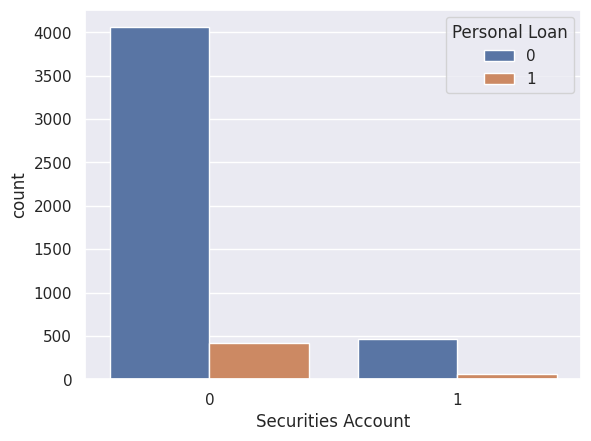

In [ ]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

Customers who has securies account are more likly to take loan. Majority of customers who does not have loan do not have securities account.

<Axes: xlabel='Family', ylabel='count'>

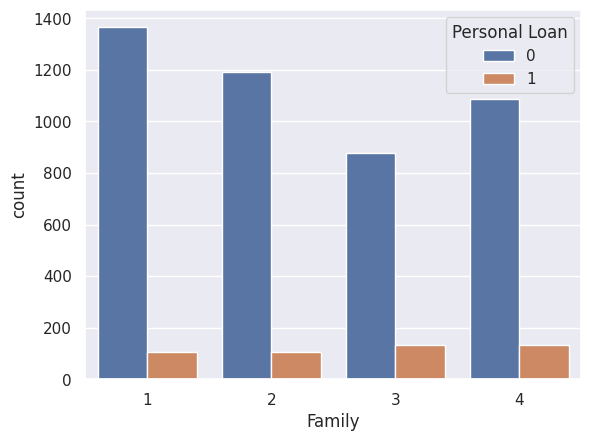

In [ ]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.

<Axes: xlabel='CD Account', ylabel='count'>

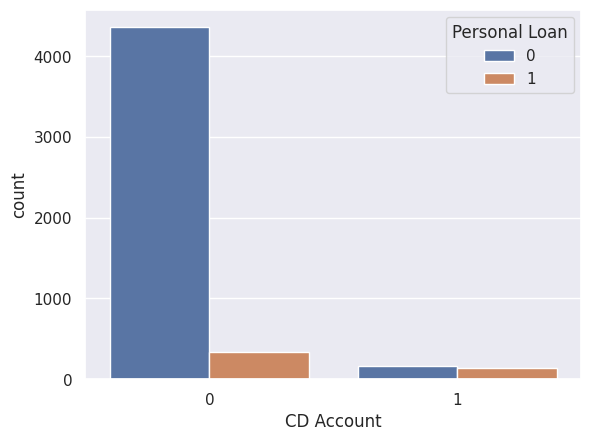

In [ ]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

<Axes: xlabel='CreditCard', ylabel='CCAvg'>

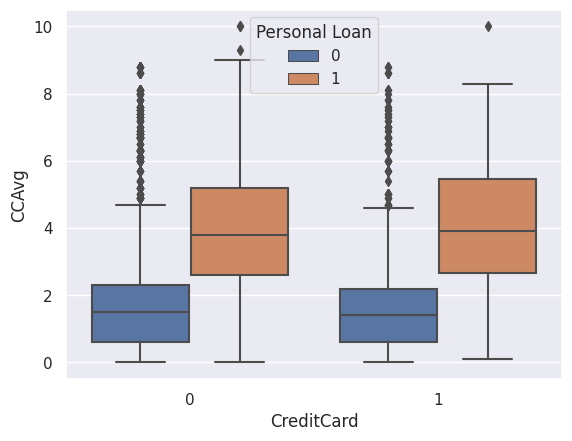

In [ ]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)

Customers who have credit card and monthly spending is higher are more likly to take loan.

<Axes: title={'center': 'Correlation of Attributes'}>

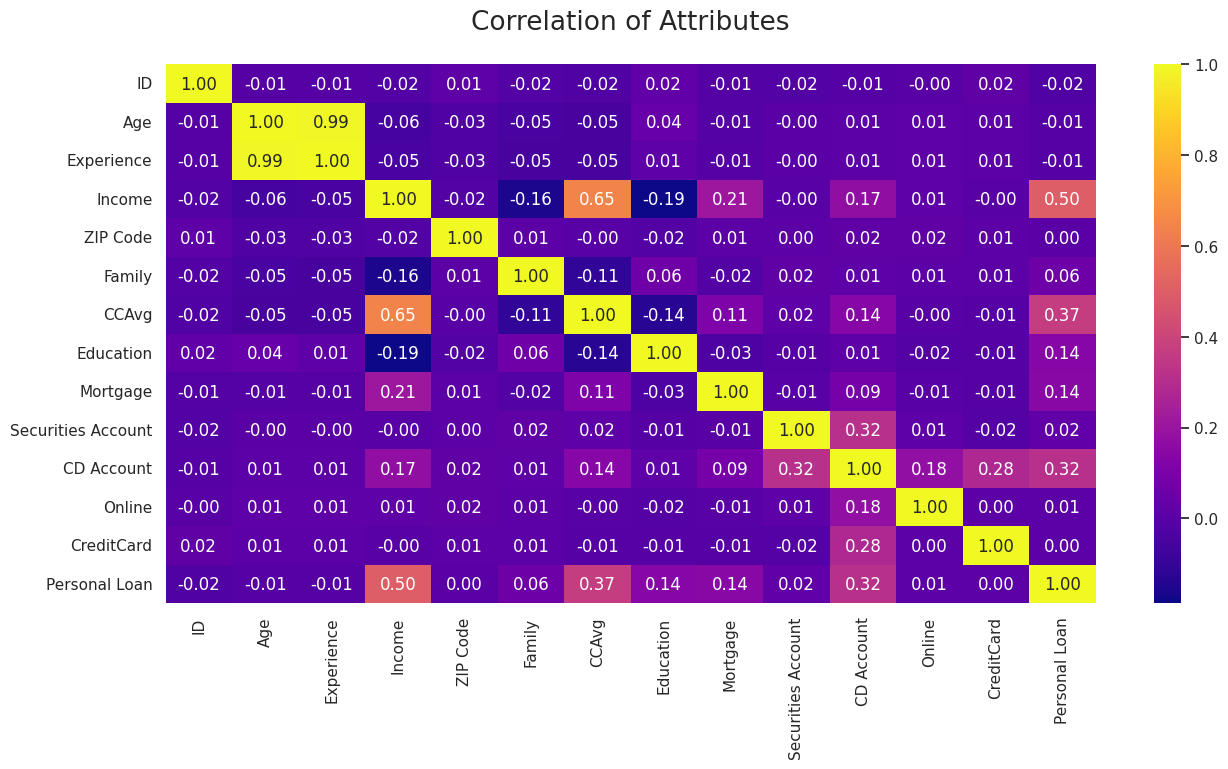

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

Age and Experience are highly correlated and the correlation is almost 1.
'Income' and 'CCAvg' is moderately correlated.
Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
We can see in above heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
'Mortgage' has moderate correlation with 'Income' which is about 12%.
'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

# Machine Learning Models

### Zip code and ID are redundant information and they have no influence over the target variable, so removing them from dataframe

In [ ]:
df = df.drop(['ID','ZIP Code'], axis=1)

In [ ]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


'Age' and 'Experience' are highly correlated so we will build our model with 'Experience' and without 'Experience' after that we will compare the accurace which will lead us to the conclution that with 'Experience' or without 'Experience' which model is better for prediction

Creating two dataframes with 'Experience' and without 'Experience'

In [ ]:
loan_with_experience = df
loan_without_experience = df.drop(['Experience'], axis=1)

Separating the target variable 'Personal Loan' from rest of the dataset

In [ ]:
# With Experience
X_Expr = loan_with_experience.drop('Personal Loan', axis=1)
Y_Expr = loan_with_experience[['Personal Loan']]

In [ ]:
# Without Experience
X_Without_Expr = loan_without_experience.drop('Personal Loan', axis=1)
Y_Without_Expr = loan_without_experience[['Personal Loan']]

Splitting the dataset into train and test set of size 70 and 30 percent respectively

In [ ]:
# With experience
X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(X_Expr, Y_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_Expr_train.shape))
print('y train data {}'.format(y_Expr_train.shape))
print('x test data  {}'.format(X_Expr_test.shape))
print('y test data  {}'.format(y_Expr_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


In [ ]:
# Without Experience
X_train, X_test, y_train, y_test = train_test_split(X_Without_Expr, Y_Without_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 10)
y train data (3500, 1)
x test data  (1500, 10)
y test data  (1500, 1)


# Logistic Regression

### With Experience

In [ ]:
# Train
logreg_expr_model = LogisticRegression()
logreg_expr_model.fit(X_Expr_train, y_Expr_train)
print(logreg_expr_model , '\n')

# Test
logreg_expr_y_predicted = logreg_expr_model.predict(X_Expr_test)
logreg_expr_score = logreg_expr_model.score(X_Expr_test, y_Expr_test)
logreg_expr_accuracy = accuracy_score(y_Expr_test, logreg_expr_y_predicted)

logestic_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, logreg_expr_y_predicted)

LogisticRegression() 



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Without Experience

In [ ]:
#X_train, X_test, y_train, y_test
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicting for test set
logreg_y_predicted = logreg_model.predict(X_test)
logreg_score = logreg_model.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
logestic_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Compare the accuracy of the models for with and without experience

In [ ]:
# Accuracy
print('Logistic Regression Model Accuracy Score W/O Experience  : %f'  % logreg_accuracy)
print('Logistic Regression Model Accuracy Score With Experience : %f'  % logreg_expr_accuracy)

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)
print('\nTrue Possitive    = ', logestic_confusion_matrix[1][1])
print('True Negative     = ',   logestic_confusion_matrix[0][0])
print('False Possive     = ',   logestic_confusion_matrix[0][1])
print('False Negative    = ',   logestic_confusion_matrix[1][0])
print('\nLogistic Regression Confusion Matrix With Experience: \n', logestic_confusion_matrix_expr)
print('\nTrue Possitive    = ', logestic_confusion_matrix_expr[1][1])
print('True Negative     = ',   logestic_confusion_matrix_expr[0][0])
print('False Possive     = ',   logestic_confusion_matrix_expr[0][1])
print('False Negative    = ',   logestic_confusion_matrix_expr[1][0])

Logistic Regression Model Accuracy Score W/O Experience  : 0.940000
Logistic Regression Model Accuracy Score With Experience : 0.944000

Logistic Regression Confusion Matrix W/O Experience: 
 [[1339   12]
 [  78   71]]

True Possitive    =  71
True Negative     =  1339
False Possive     =  12
False Negative    =  78

Logistic Regression Confusion Matrix With Experience: 
 [[1334   17]
 [  67   82]]

True Possitive    =  82
True Negative     =  1334
False Possive     =  17
False Negative    =  67


From the above accuracy results we see that accuracy is higher with 'Experience' (94.60 %) than without 'Experience' (94.26%).
Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better with 'Experience'.
Type 1 (False Possitive) and Type 2(False Negative) errors is less with experience.
Hence we can imporove the accuracy by scaling the attributes.
We will not consider dafaframe without 'Experience' for further iteration.

# Iteration 2 For Logistic Regression with Experience

In [ ]:
X_train_scaled = preprocessing.scale(X_Expr_train)
X_test_scaled = preprocessing.scale(X_Expr_test)

In [ ]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_Expr_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)
scaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('After Scaling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_accuracy)
print('\nAfter Scaling Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_Expr_test, scaled_logreg_y_predicted))
conf_table = scaled_logreg_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

After Scaling Logistic Regression Model Accuracy Score with Experience: 0.947333

After Scaling Logistic Regression Confusion Matrix With Experience: 
 [[1333   18]
 [  61   88]]

True Possitive    =  88
True Negative     =  1333
False Possive     =  18
False Negative    =  61

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Accuracy of accepting Loan  :  0.95
precision of accepting Loan :  0.83
recall of accepting Loan    :  0.59
F1 score of accepting Loan  :  0.69


# KNN

We will follow the same procedures as we have followed in Logistic Regression.
We will try the model with 'Experience' and without 'Experience'.
Will run the KNN with number of odd neighbours ranges from 1 to 20 and will find the optimal number of neighbours using the Mis classification error.
After finding best K, will build the model using 'Experience' and without 'Experience'.

Finding Best K

Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.9086666666666666, 0.9093333333333333, 0.906, 0.9026666666666666, 0.9053333333333333, 0.908, 0.908, 0.9066666666666666, 0.9073333333333333, 0.904]

Misclassification error :
 [0.09133333333333338, 0.09066666666666667, 0.09399999999999997, 0.09733333333333338, 0.09466666666666668, 0.09199999999999997, 0.09199999999999997, 0.09333333333333338, 0.09266666666666667, 0.09599999999999997]

The optimal number of neighbor is k= 3


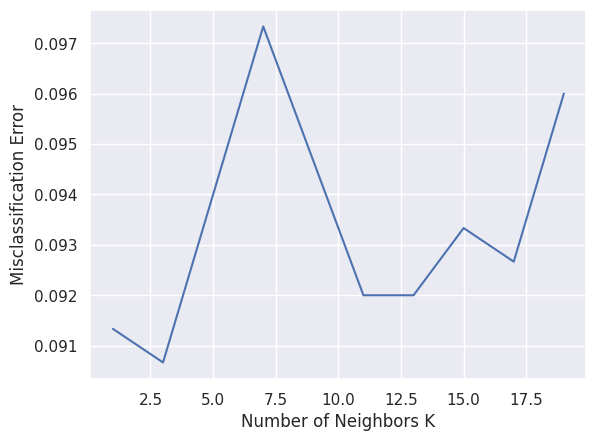

In [ ]:
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

#Declearing a empty list that will hold the accuracy scores
ac_scores = []
#performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())               
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)                

MSE = [1 - x for x in ac_scores] # changing to misclassification error


# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Without Experience 

Build Model

Without Experience

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_y_predicted = knn_model.predict(X_test)
knn_score = knn_model.score(X_test, y_test)
knn_accuracy = accuracy_score(y_test, knn_y_predicted)
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


With experience

In [ ]:
knn_model_expr = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model_expr.fit(X_Expr_train, y_Expr_train)
knn_expr_y_predicted = knn_model_expr.predict(X_Expr_test)
knn_expr_score = knn_model_expr.score(X_Expr_test, y_Expr_test)
knn_expr_accuracy = accuracy_score(y_Expr_test, knn_expr_y_predicted)
knn_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, knn_expr_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Comparing both the models

In [ ]:
# Comparison 
print('K-NN Model Accuracy Score W/O Experience  : %f'  % knn_accuracy)
print('K-NN Model Accuracy Score With Experience : %f'  % knn_expr_accuracy)

# Confusion Matrix
print('\nK-NN Confusion Matrix W/O Experience: \n', knn_confusion_matrix)
print('\nTrue Possitive    = ', knn_confusion_matrix[1][1])
print('True Negative     = ',   knn_confusion_matrix[0][0])
print('False Possive     = ',   knn_confusion_matrix[0][1])
print('False Negative    = ',   knn_confusion_matrix[1][0])
print('\nK-NN Confusion Matrix With Experience: \n', knn_confusion_matrix_expr)
print('\nTrue Possitive    = ', knn_confusion_matrix_expr[1][1])
print('True Negative     = ',   knn_confusion_matrix_expr[0][0])
print('False Possive     = ',   knn_confusion_matrix_expr[0][1])
print('False Negative    = ',   knn_confusion_matrix_expr[1][0])

K-NN Model Accuracy Score W/O Experience  : 0.909333
K-NN Model Accuracy Score With Experience : 0.904000

K-NN Confusion Matrix W/O Experience: 
 [[1304   47]
 [  89   60]]

True Possitive    =  60
True Negative     =  1304
False Possive     =  47
False Negative    =  89

K-NN Confusion Matrix With Experience: 
 [[1301   50]
 [  94   55]]

True Possitive    =  55
True Negative     =  1301
False Possive     =  50
False Negative    =  94


From the above accuracy results we see that accuracy is higher at without 'Experience' (90.93%) than with 'Experience' (90.20%).
Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better at without 'Experience'.
Type 1 (False Possitive) and Type 2(False Negative) errors is less at without Experience.
Hence we can imporove the accuracy by Scaling the attributes.
We will not consider dafaframe 'With Experience' for further iteration.

# Iteration 2 For K-NN without Experience dataset

In [ ]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
scaled_knn_model.fit(X_train_scaled, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(X_test_scaled)
scaled_knn_score = scaled_knn_model.score(X_test_scaled, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
scaled_knn_confusion_matrix = metrics.confusion_matrix(y_test, scaled_knn_y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print('After Scaling K-NN Model Accuracy Score without Experience: %f'  % scaled_knn_accuracy)
print('\nAfter Scaling K-NN Confusion Matrix Without Experience: \n', scaled_knn_confusion_matrix)
print('\nTrue Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_knn_y_predict))
knn_conf_table = scaled_knn_confusion_matrix
a = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

After Scaling K-NN Model Accuracy Score without Experience: 0.958667

After Scaling K-NN Confusion Matrix Without Experience: 
 [[1341   10]
 [  52   97]]

True Possitive    =  97
True Negative     =  1341
False Possive     =  10
False Negative    =  52

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.65      0.76       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Accuracy of accepting Loan  :  0.96
precision of accepting Loan :  0.91
recall of accepting Loan    :  0.65
F1 score of accepting Loan  :  0.76


# Naive Bayes


We will try the model with 'Experience' and without 'Experience'.


Without Experience

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_predicted = gnb_model.predict(X_test)
gnb_score = gnb_model.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With Experience

In [ ]:
gnb_expr_model = GaussianNB()
gnb_expr_model.fit(X_Expr_train, y_Expr_train)
gnb_expr_y_predicted = gnb_expr_model.predict(X_Expr_test)
gnb_expr_score = gnb_expr_model.score(X_Expr_test, y_Expr_test)
gnb_expr_accuracy = accuracy_score(y_Expr_test, gnb_expr_y_predicted)
gnb_expr_confusion_matrix = metrics.confusion_matrix(y_Expr_test, gnb_expr_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Comparison

In [ ]:
print('Naïve Bayes Model Accuracy Score W/O Experience  : %f'  % gnb_accuracy)
print('Naïve Bayes Model Accuracy Score With Experience : %f'  % gnb_expr_accuracy)

# Confusion Matrix
print('\nNaïve Bayes Confusion Matrix W/O Experience: \n', gnb_confusion_matrix)
print('\nTrue Possitive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Possive     = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])
print('\nNaïve Bayes Confusion Matrix With Experience: \n', gnb_expr_confusion_matrix)
print('\nTrue Possitive    = ', gnb_expr_confusion_matrix[1][1])
print('True Negative     = ',   gnb_expr_confusion_matrix[0][0])
print('False Possive     = ',   gnb_expr_confusion_matrix[0][1])
print('False Negative    = ',   gnb_expr_confusion_matrix[1][0])

Naïve Bayes Model Accuracy Score W/O Experience  : 0.874667
Naïve Bayes Model Accuracy Score With Experience : 0.874667

Naïve Bayes Confusion Matrix W/O Experience: 
 [[1227  124]
 [  64   85]]

True Possitive    =  85
True Negative     =  1227
False Possive     =  124
False Negative    =  64

Naïve Bayes Confusion Matrix With Experience: 
 [[1228  123]
 [  65   84]]

True Possitive    =  84
True Negative     =  1228
False Possive     =  123
False Negative    =  65


From the above accuracy results we see that accuracy is alomost at without 'Experience' and with 'Experience'.
Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is almost same at without 'Experience'.
Type I (False Possitive) and Type II(False Negative) errors is same.
Hence we can imporove the accuracy by Scaling the attributes.
We can consider any dafaframe 'With Experience' or 'Without Experience' for further iteration.

# Iteration 2 For Naïve Bayes without Experience dataset

In [ ]:
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(X_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(X_test_scaled, y_test)
scaled_gnb_accuracy = accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('After Scaling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nAfter Scaling Naïve Bayes Confusion Matrix: \n', scaled_gnb_connfusion_matrix)
print('\nTrue Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])
print('\n Gaussian Naive Bayes classification Report : \n',metrics.classification_report(y_test, gnb_y_predicted))
gnb_conf_table = scaled_gnb_connfusion_matrix
a = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + knn_conf_table[1,1])
p = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan   : ",round(a,2))
print("precision of accepting Loan  : ",round(p,2))
print("recall of accepting Loan     : ",round(r,2))
print("F1 score of accepting Loan   : ",round(f,2))

After Scaling Naïve Bayes Model Accuracy Score: 0.872000

After Scaling Naïve Bayes Confusion Matrix: 
 [[1224  127]
 [  65   84]]

True Possitive    =  84
True Negative     =  1224
False Possive     =  127
False Negative    =  65

 Gaussian Naive Bayes classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500


Accuracy of accepting Loan   :  0.86
precision of accepting Loan  :  0.4
recall of accepting Loan     :  0.56
F1 score of accepting Loan   :  0.47


# Comparison of the models

Overall Model Accuracy After scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 96%
Naive Bayes         : 87%

Overall Model Confusion matrix After scaling:


Logistic Regression: 
 [[1333   18]
 [  61   88]]

     True Possitive    =  88
     True Negative     =  1333
     False Possive     =  18
     False Negative    =  61

K-Nearest Neighbors: 
 [[1341   10]
 [  52   97]]

    True Possitive    =  97
    True Negative     =  1341
    False Possive     =  10
    False Negative    =  52

Naive Bayes: 
 [[1224  127]
 [  65   84]]

    True Possitive    =  84
    True Negative     =  1224
    False Possive     =  127
    False Negative    =  65


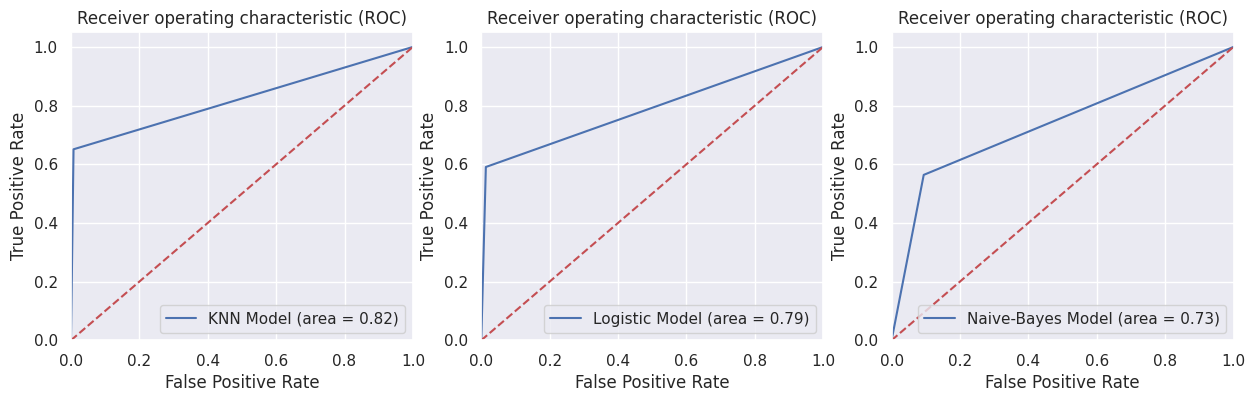

In [ ]:
print('Overall Model Accuracy After scaling:\n')
print ('Logistic Regression : {0:.0f}%'. format(scaled_logreg_accuracy * 100))
print ('K-Nearest Neighbors : {0:.0f}%'. format(scaled_knn_accuracy * 100))
print ('Naive Bayes         : {0:.0f}%'. format(scaled_gnb_accuracy * 100))

print('\nOverall Model Confusion matrix After scaling:\n')
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n     True Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('     True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('     False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('     False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print('\nK-Nearest Neighbors: \n', scaled_knn_confusion_matrix)
print('\n    True Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('    True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('    False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('    False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print('\nNaive Bayes: \n', scaled_gnb_connfusion_matrix)
print('\n    True Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('    True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('    False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('    False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])




knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, scaled_knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, scaled_knn_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_Expr_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_Expr_test, scaled_logreg_y_predicted)
fig1_graph.add_subplot(1,3,2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, scaled_gnb_y_predict)
nb_roc_auc = metrics.roc_auc_score(y_test, scaled_gnb_y_predict)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Final Conclusion

Using Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model

From the above, we can clearly see that k-Nearest Neighbors Alogorithm with scaled data gives us best accuracy of 96%.

Also the Type I(False Posssitive) and Type II(False Negative) errors are least in K-Nearest model.

The area in ROC curve for K-NN is 0.82 which is close to 1 which stats that K-NN is the best model in comparesion of Logistic Model and Naive-Bayes Model whose ROC area is 0.79 and 0.73 repectively.

Hence among the above three algorithm applied on the underline dataset, K-NN would be the best choice to predict the customers who will accept the personal loan.